<a href="https://colab.research.google.com/github/khagerthey/VIS1/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import time, os, sys, re
import zipfile, json, datetime, string 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib                                                 

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() 

#aok good; for future please update like i did with magic command %matplotlib inline  and plt.style.use('default')


PS4:
1. tell a story with vis, say 1-10 graphs, the fewer the better!, focus on what the data are telling us, make it engaging and utilitarian/useful 
2. don’t overcomplicate, best stories are simple (but be thorough, do the work, do robustness checks, triangulate, etc–all of that in notebook, but then the story you tell and present is basic and simple, top of the iceberg, the choisest, the cream of the crop)–its like top research say in nature or science–it’s a page or two (but its based on say 20 or 50 pages of output in appendix or supplementray material) 

This is going to be a rough draft of the final project. This back to original hypothesis and research.


My mission is to find the cause for glass breakages and a realistic solution to the problem that would satisfy the company.


What is my story?

Company is experiencing excessive glass breakages. This is an issue because it is costly and dangerous for the consumer.

How do you know? *insert current glass breakage stats*
- Compare lines to target main issue
- Once line is identified, look into type of glass



In [3]:
CHGlass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%203-6-23%20to%202-25-23.csv')
CHGlass

,Unnamed: 0,Dec-22,Nov-22,Oct-22,Sep-22,Aug-22,Jul-22,Jun-22,May-22,Apr-22,Mar-22,Feb-22,Jan-22
0,TOTAL SUM,324896,766480,793936,1267552,940368,336336,761934,441644,940368,1063920,336336,581152


This are the total sums of glass ordered each month in 2022 with a grand total of 8554922 for the year. This is only glass used on line 3 which will be our main focus towards glass breakages.
This data was retrieved from our inventroy database via Windows SL.

In [4]:
CHGlass=plt.graph

AttributeError: ignored

- - Joe Spang data pull for SL for total glass usage thru years to get an estimate of how much overall loss

What are some of the reasons for glass breakages?
- Use thermal shock data
- Most companies have an external glass heater on each line (we do not)

What are some possible solutions to explore?
- Glass alternative data
- Is plastic an option data

#Glass Alternatives


In the case that my company would like to continue using glass, Borosilicate is a great glass alternative to Soda-lime.
Below is a table sourced from Kopp Glass. https://www.koppglass.com/blog/3-common-glass-types-properties-and-applications

In [ ]:
glasstypes=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20Types%20-%20Sheet1.csv')
glasstypes

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers


In [ ]:
glasscompounds=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20compounds%20-%20Sheet4%20(1).csv')
glasscompounds = glasscompounds.rename(columns={'Compound':'Glass Type'})
glasscompounds['Glass Type'].replace({'Borosilicate Glass – % content':'Borosilicate'})
glasscompounds
#'Compound' header has been changed to 'Glass Type' to merge

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate Glass – % content,80.6,13,4,2.4
1,Soda Lime Glass – % content,69.0,1,13,4.0


In [ ]:
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Borosilicate Glass – % content'], 'Borosilicate')
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Soda Lime Glass – % content'], 'Soda-lime silicate')
#Material names changed to merge with first table
glasscompounds

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate,80.6,13,4,2.4
1,Soda-lime silicate,69.0,1,13,4.0


In [ ]:
#avoid hand hacking; use code
names = list(glasscompounds.columns)[1:]
names
values=glasscompounds[glasscompounds['Glass Type']=='Borosilicate'].values.flatten().tolist()[1:]
values

[80.6, 13, 4, 2.4]

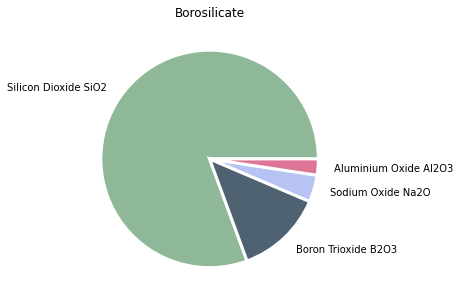

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
#names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
#values=[80.6,13,4,2.4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Borosilicate')
plt.show();

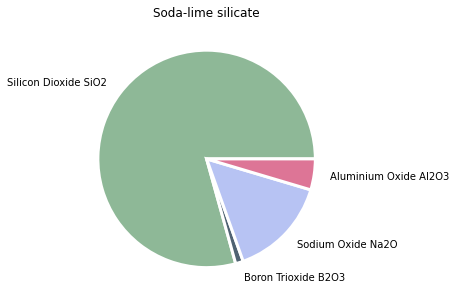

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
values=[69,1,13,4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Soda-lime silicate')
plt.show();

In [ ]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='outer', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13.0,4.0,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1.0,13.0,4.0,both
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers,NaN,NaN,NaN,NaN,left_only


In [ ]:
mergedglass.present.value_counts(sort=False)
#expected not to merge on Phosphates, as there was no data given on the second table

left_only     1
right_only    0
both          2
Name: present, dtype: int64

In [ ]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='inner', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13,4,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1,13,4.0,both


Plastic is not an option for company, so if the question arises have data avaliable for questions!